In [3]:
import mne
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo .edf
archivo_edf = r'data/prueba.edf'

# Cargar el archivo .edf
raw_data = mne.io.read_raw_edf(archivo_edf, preload=True, stim_channel='auto', verbose='error')

# Aplicar un filtro después de cargar los datos
raw_data.filter(l_freq=0.1, h_freq=100.0)

# Obtener los datos en formato de matriz numpy
datos = raw_data.get_data()

# Obtener los nombres de los canales
nombres_canales = raw_data.ch_names

# Crear un DataFrame de pandas
df = pd.DataFrame(datos.T, columns=nombres_canales)

# Visualizar el DataFrame
print(df.head(60))


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 s)

          EEG O1        EEG O2        EEG T3        EEG T4
0  -5.421011e-20  8.368686e-19 -5.421011e-20 -1.084202e-19
1  -2.834964e-08  1.986247e-08 -2.105178e-08  2.711226e-08
2  -5.670897e-08  3.972498e-08 -4.209376e-08  5.422455e-08
3  -8.507792e-08  5.958756e-08 -6.312592e-08  8.133687e-08
4  -1.134564e-07  7.945023e-08 -8.414819e-08  1.084492e-07
5  -1.418445e-07  9.931304e-08 -1.051605e-07  1.355617e-07
6  -1.702419e-07 

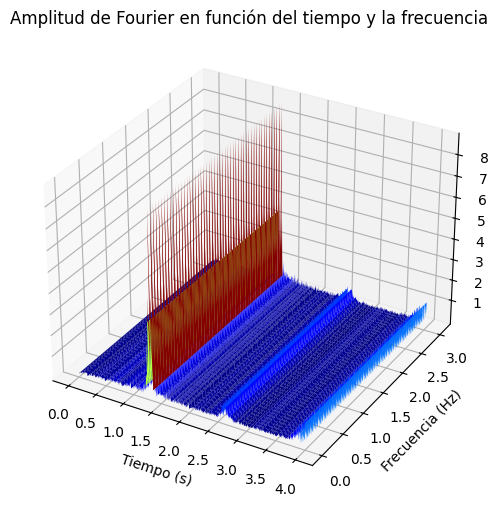

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mne

# Promediar los datos a lo largo del tiempo
datos_promediados = np.mean(raw_data.get_data(), axis=0)

# Calcular la transformada de Fourier de los datos promediados
fft_values = np.fft.fft(datos_promediados)

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(datos_promediados.shape[0], d=1/raw_data.info['sfreq'])

# Limitar el rango de frecuencias y el número de puntos en el tiempo
num_puntos_tiempo = min(1000, len(raw_data.times))  # Limitar a 1000 puntos en el tiempo
frecuencias_limitadas = frecuencias[:num_puntos_tiempo]
tiempo_limitado = raw_data.times[:num_puntos_tiempo]

# Expandir fft_values a una matriz bidimensional y repetir para cada frecuencia
fft_values_expandido = np.abs(fft_values[:num_puntos_tiempo])
fft_values_expandido = np.repeat(fft_values_expandido[:, np.newaxis], len(frecuencias_limitadas), axis=1)

# Crear la figura 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear una malla para los datos
X, Y = np.meshgrid(tiempo_limitado, frecuencias_limitadas)

# Graficar los datos
ax.plot_surface(X, Y, fft_values_expandido.T, cmap='jet')

# Etiquetas y título
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Frecuencia (Hz)')
ax.set_zlabel('Amplitud de Fourier')
ax.set_title('Amplitud de Fourier en función del tiempo y la frecuencia')

plt.show()


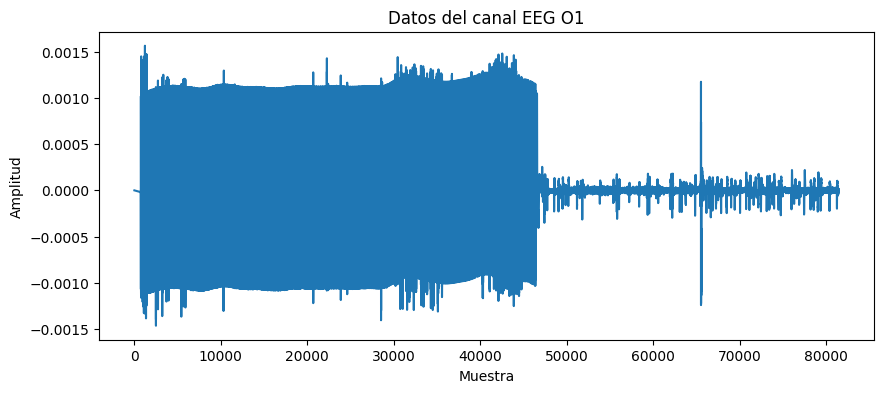

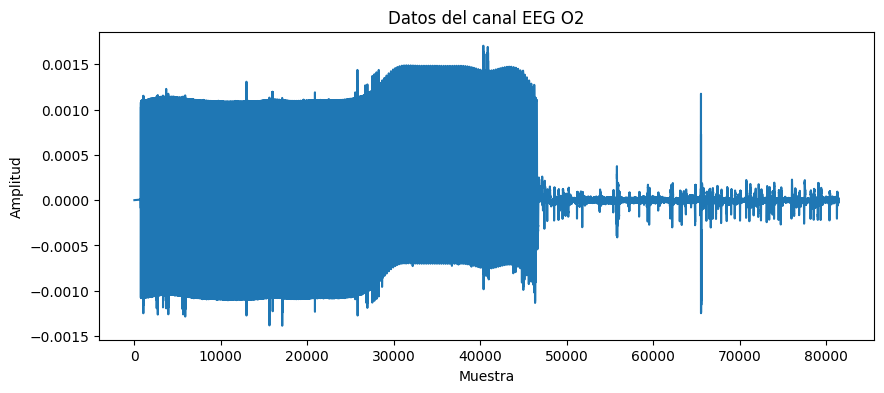

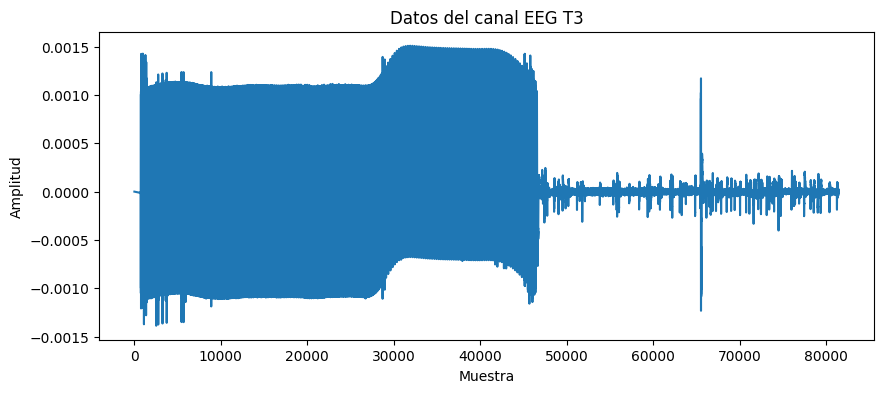

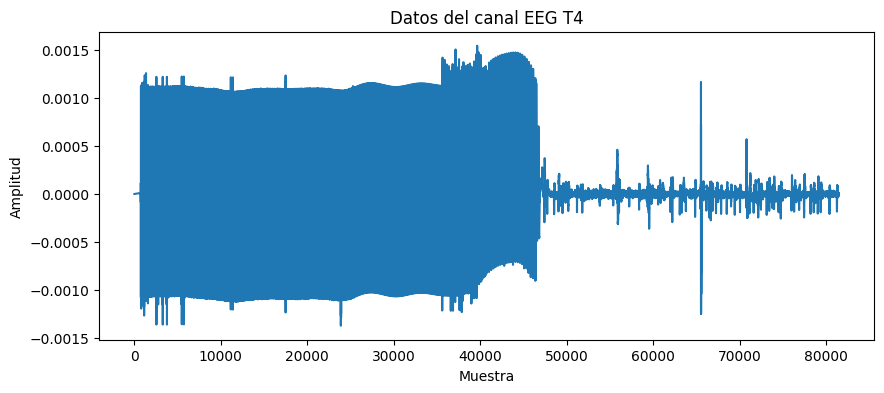

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\1615682228.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmax=50, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

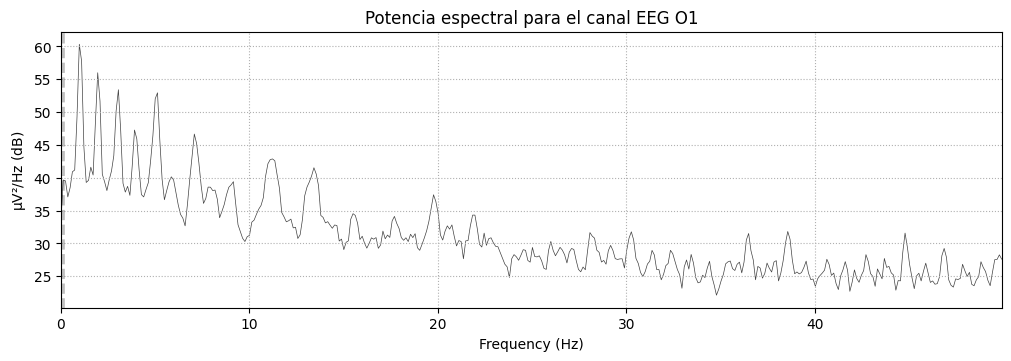

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\1615682228.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmax=50, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

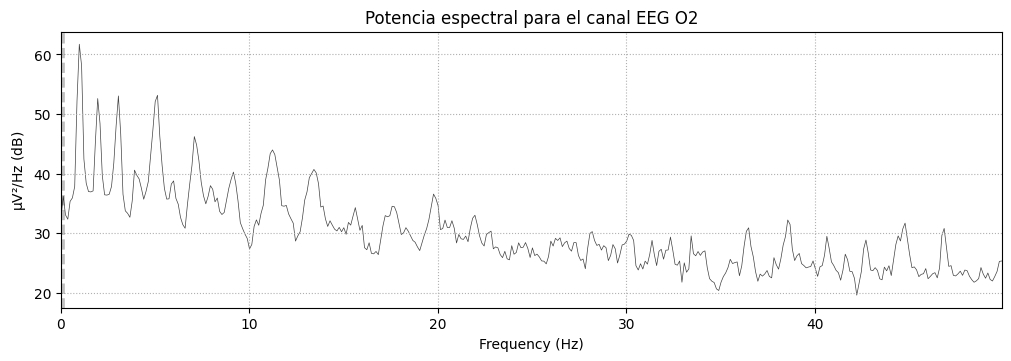

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\1615682228.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmax=50, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

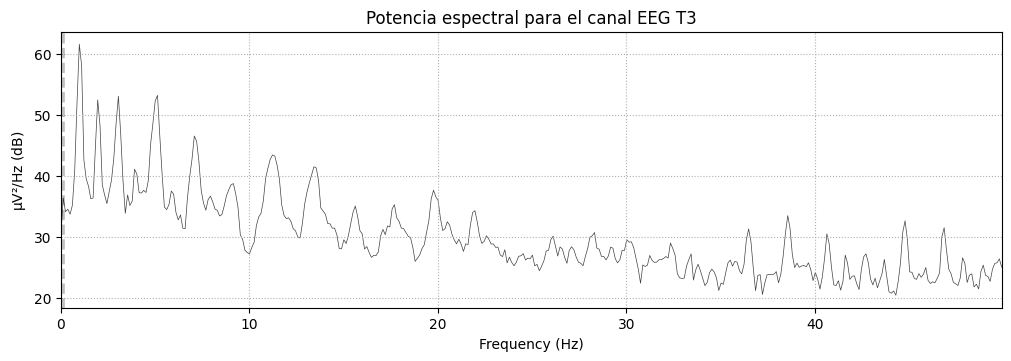

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\1615682228.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmax=50, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

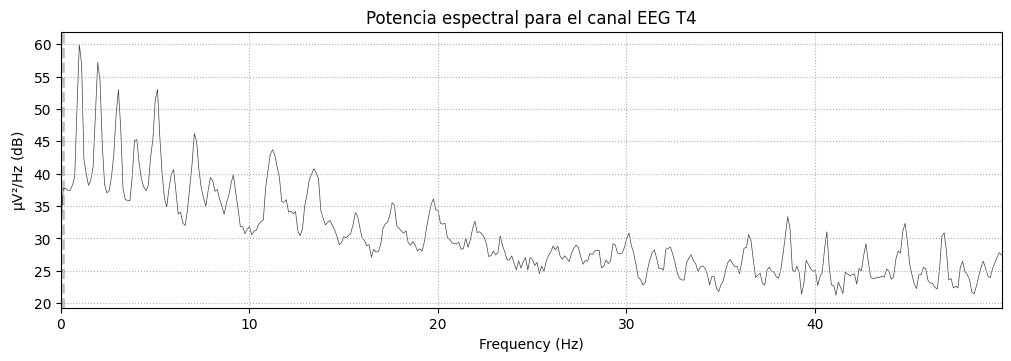

In [8]:
# Obtener los datos en formato de matriz numpy
datos = raw_data.get_data()

# Obtener los nombres de los canales
nombres_canales = raw_data.ch_names

# Crear un DataFrame de pandas
df = pd.DataFrame(datos.T, columns=nombres_canales)

# Visualizar cada canal en el tiempo
for canal in nombres_canales:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[canal])
    plt.title(f'Datos del canal {canal}')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    plt.show()

# Visualizar la potencia espectral para cada canal
for canal in nombres_canales:
    plt.figure(figsize=(6, 4))
    raw_data.plot_psd(fmax=50, n_fft=2048, picks=canal, show=False)
    plt.title(f'Potencia espectral para el canal {canal}')
    plt.show()

Using matplotlib as 2D backend.


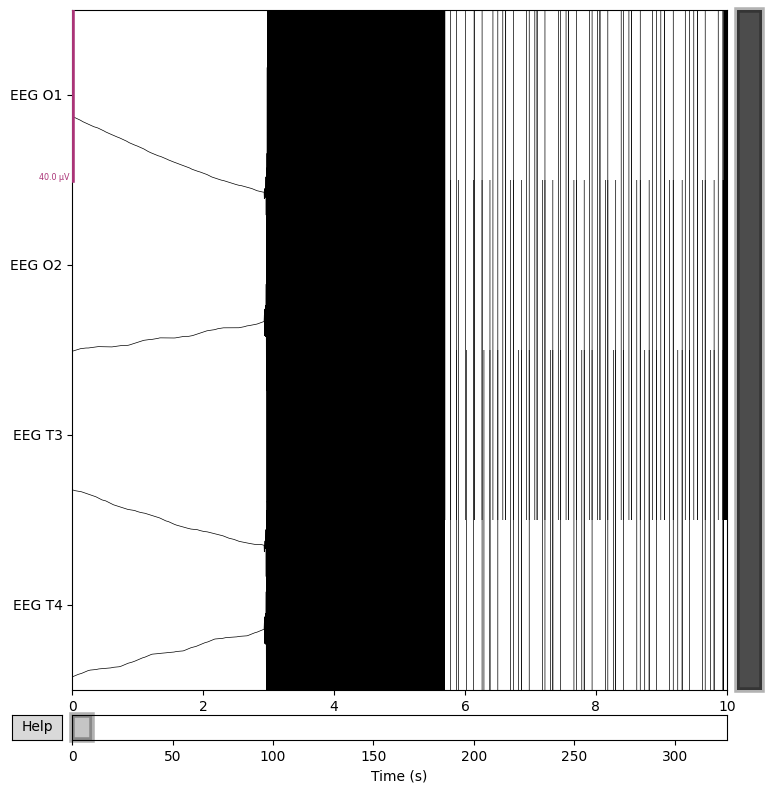

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


c:\Users\adria\Projects\Brainbit\.venv\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


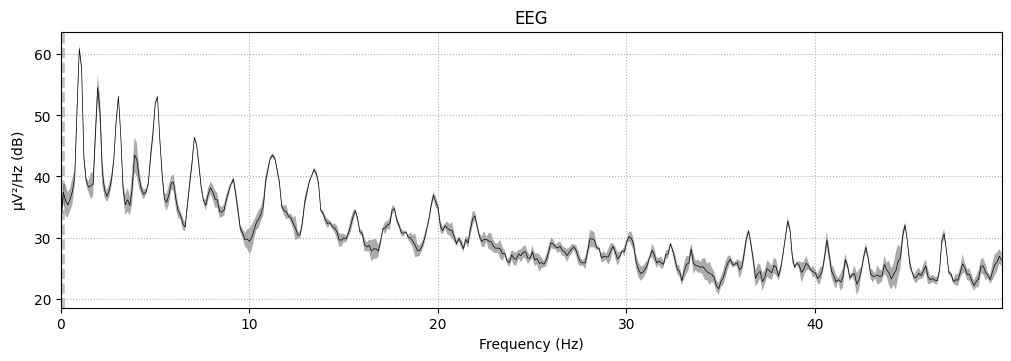

In [9]:
# Visualizar algunos canales en el tiempo
raw_data.plot(n_channels=5, duration=10, show=True, title="EEG Channel Data Over Time")

# Visualizar la potencia espectral
raw_data.plot_psd(fmax=50, n_fft=2048, show=True, average=True)

# Mostrar los gráficos
plt.show()

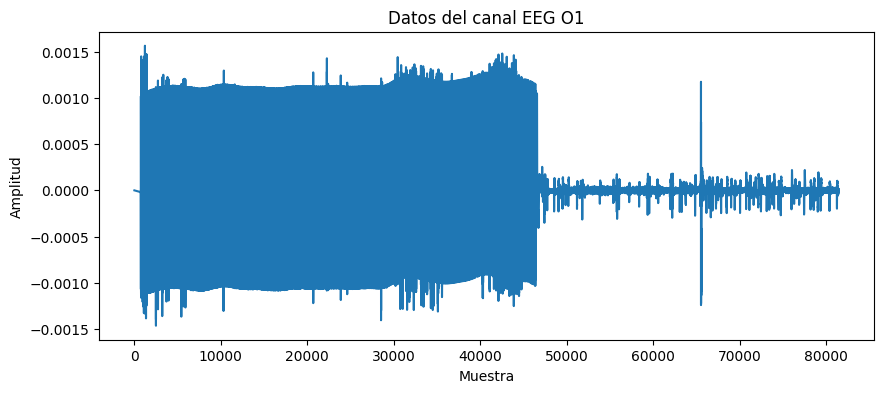

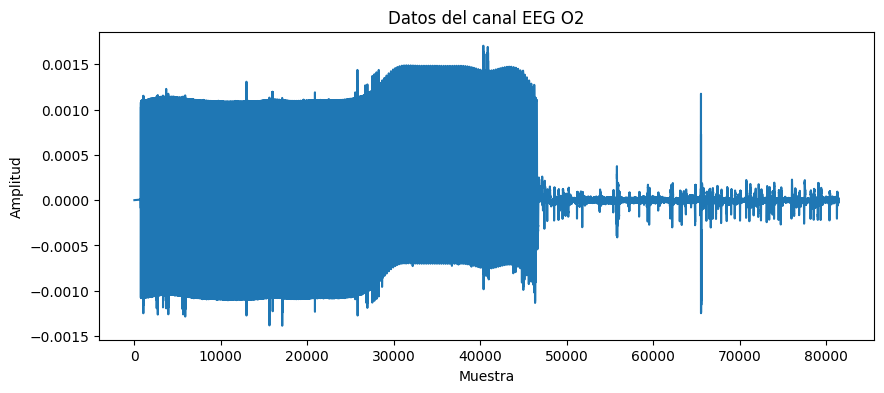

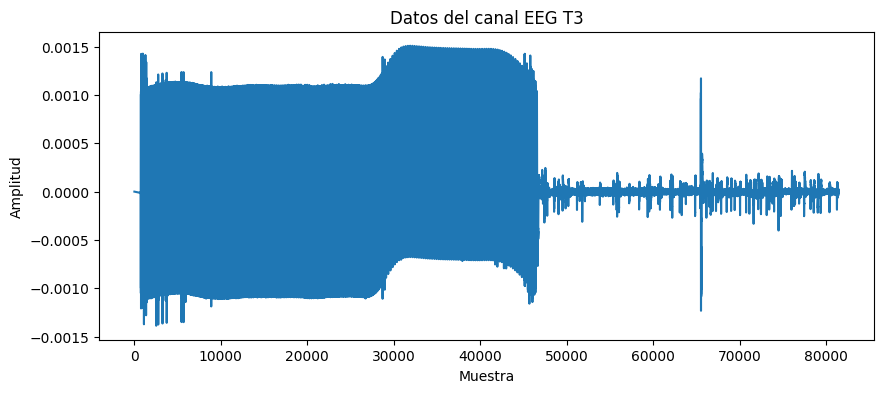

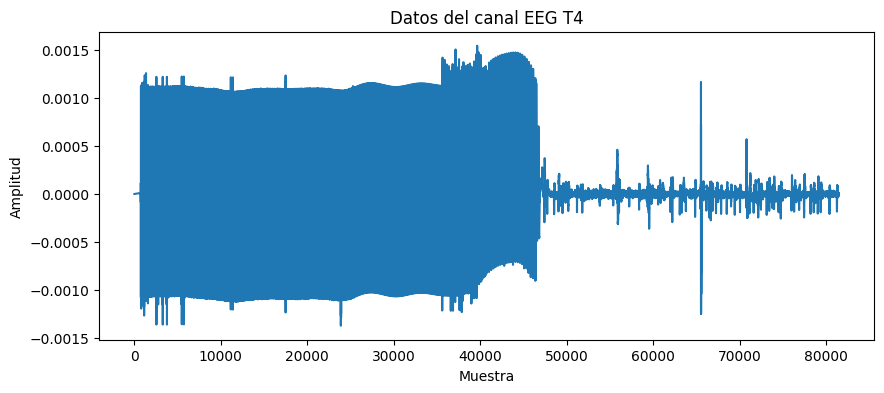

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\3217162192.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

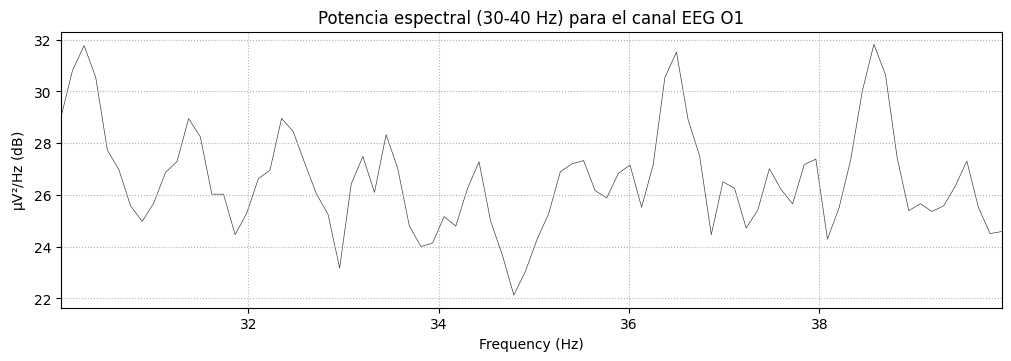

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\3217162192.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

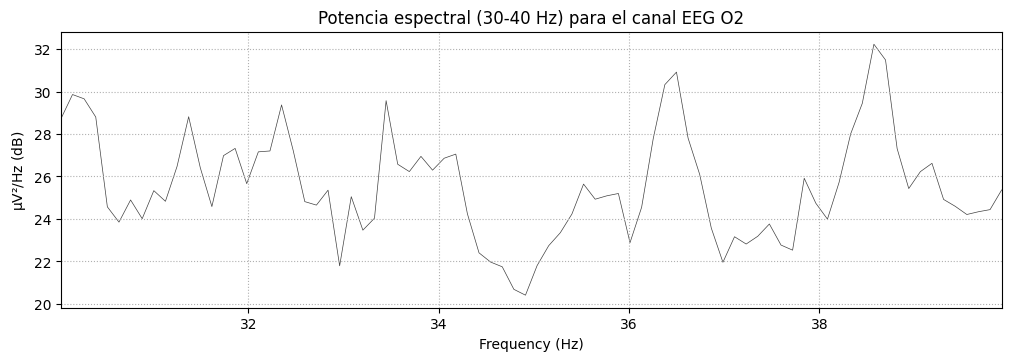

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\3217162192.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

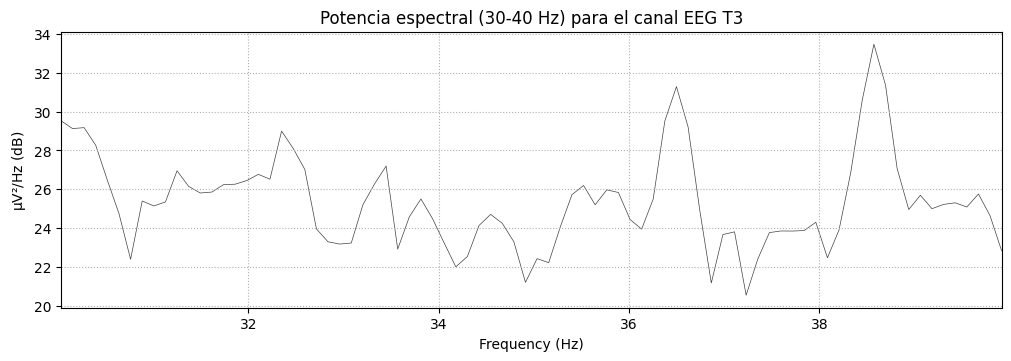

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\3217162192.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False)


<Figure size 600x400 with 0 Axes>

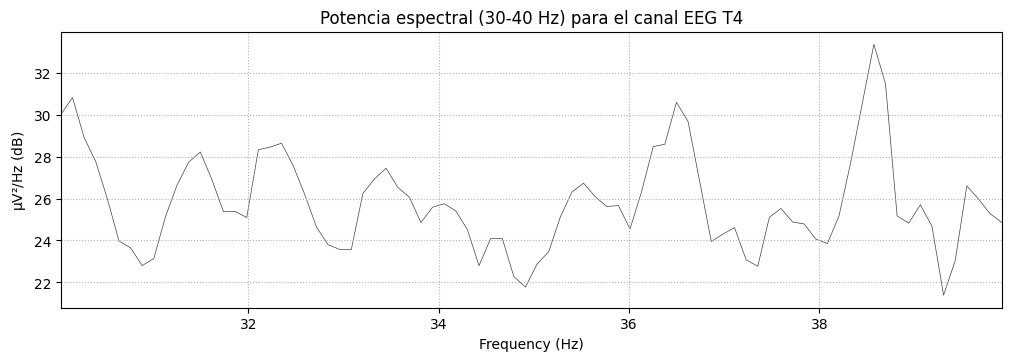

In [10]:
# Obtener los datos en formato de matriz numpy
datos = raw_data.get_data()

# Obtener los nombres de los canales
nombres_canales = raw_data.ch_names

# Crear un DataFrame de pandas
df = pd.DataFrame(datos.T, columns=nombres_canales)

# Visualizar cada canal en el tiempo
for canal in nombres_canales:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[canal])
    plt.title(f'Datos del canal {canal}')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    plt.show()

# Visualizar la potencia espectral para cada canal (30-40 Hz)
for canal in nombres_canales:
    plt.figure(figsize=(6, 4))
    raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False)
    plt.title(f'Potencia espectral (30-40 Hz) para el canal {canal}')
    plt.show()

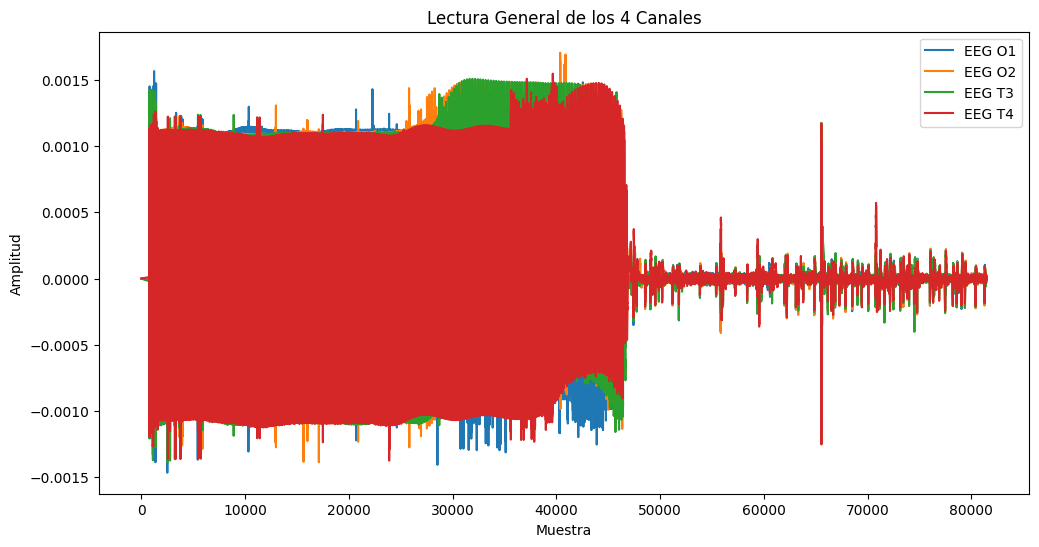

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\205021264.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False, color=canal)
C:\Users\adria\AppData\Local\Temp\ipykernel_18428\205021264.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False, color=canal)
C:\Users\adria\AppData\Local\Temp\ipykernel_18428\205021264.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False, color=canal)


Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\adria\AppData\Local\Temp\ipykernel_18428\205021264.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False, color=canal)


<Figure size 1000x600 with 0 Axes>

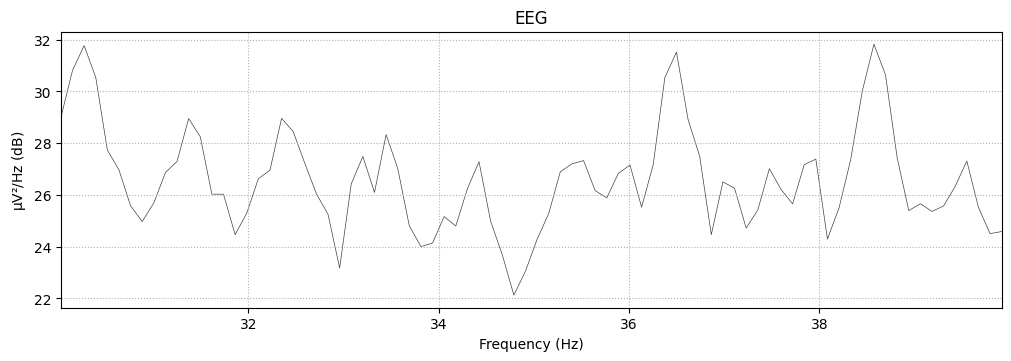

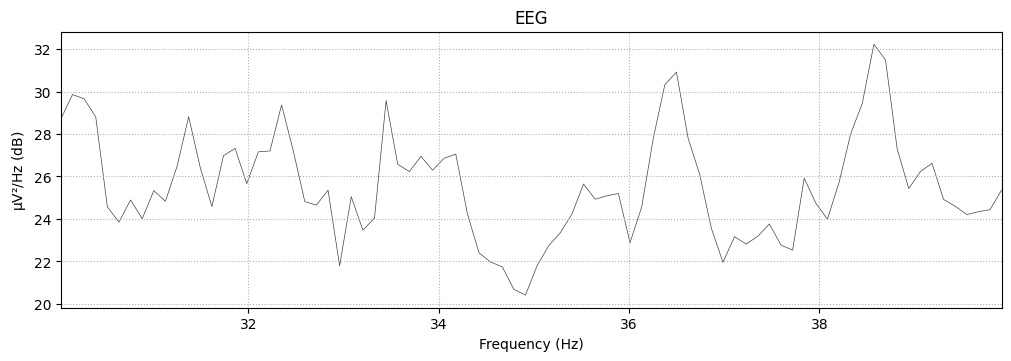

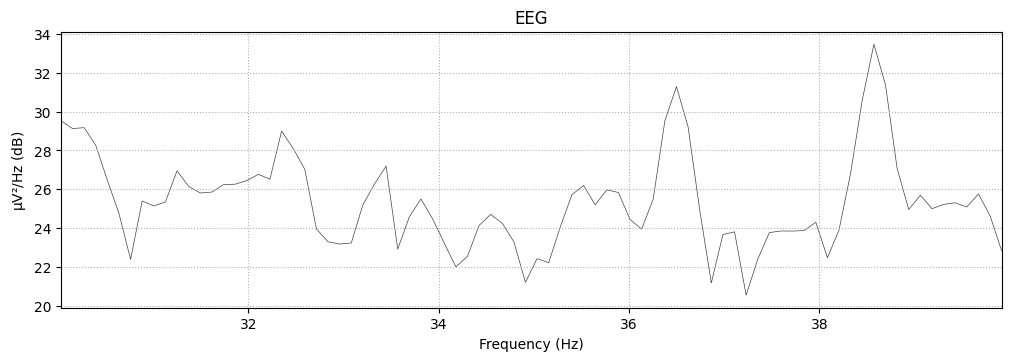

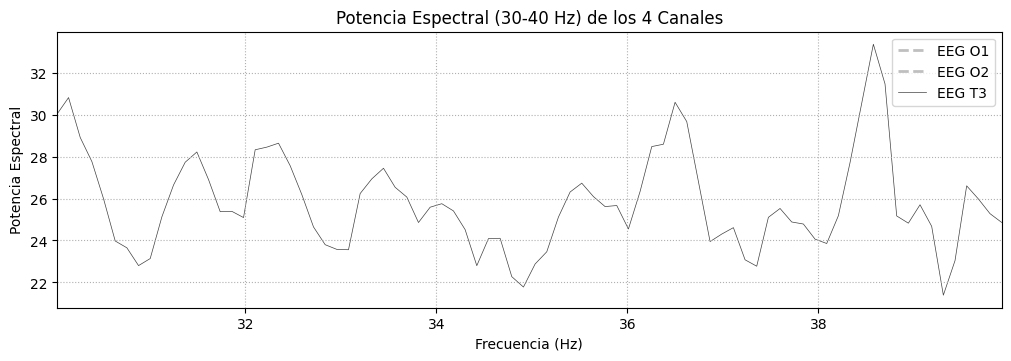

In [11]:
# Visualizar la lectura general de los 4 canales en el tiempo
plt.figure(figsize=(12, 6))
for canal in nombres_canales:
    plt.plot(df.index, df[canal], label=canal)

plt.title('Lectura General de los 4 Canales')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Visualizar la potencia espectral para los 4 canales (30-40 Hz)
plt.figure(figsize=(10, 6))
for canal in nombres_canales:
    raw_data.plot_psd(fmin=30, fmax=40, n_fft=2048, picks=canal, show=False, color=canal)

plt.title('Potencia Espectral (30-40 Hz) de los 4 Canales')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia Espectral')
plt.legend(nombres_canales)
plt.show()